<div style="max-width:1200px"><img src="../_resources/mgnify_banner.png" width="100%"></div>

<img src="../_resources/mgnify_logo.png" width="200px">

# Peform GO Terms Analysis for a MGnify Study

**This notebook provides a step-by-step guide on conducting a Gene Ontology (GO) terms analysis for a study in MGnify.**

This notebook is divided in 5 sections:
- 1: Libraries needed to run the full notebook
- 2: go-slim data analysis
- 3: go tree
- 4: go heatmap


This is an interactive code notebook (a Jupyter Notebook).
To run this code, click into each cell and press the ▶ button in the top toolbar, or press `shift+enter`.

---

#### Import packages

Execute the code below to import the Python libraries required to run the examples presented in this notebook.

In [1]:
# Connection to MGnify API
from lib.variable_utils import *
from lib.GO_utils import *
import requests

# Dataframes and display
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Plots
import altair as alt
import graphviz
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

#### Select a Study

In [2]:
accession = get_variable_from_link_or_input('MGYS', 'Study Accession', 'MGYS00002008')

Type a Study Accession [default: MGYS00002008] 


Using "MGYS00002008" as Study Accession


### Displaying Metadata of the Study w.r.t GO Terms

In [3]:
go_metadata = get_GO_metadata(accession)

display_GO_metadata(go_metadata)

**GO Slim annotation Metadata**

,Name,Label,Pipeline,Link
4,ERP104174_GO-slim_abundances_v5.0.tsv,GO slim annotation,5.0,https://www.ebi.ac.uk/metagenomics/api/v1/studies/MGYS00002008/pipelines/5.0/file/ERP104174_GO-slim_abundances_v5.0.tsv
2,ERP104174_GO-slim_abundances_v4.1.tsv,GO slim annotation,4.1,https://www.ebi.ac.uk/metagenomics/api/v1/studies/MGYS00002008/pipelines/4.1/file/ERP104174_GO-slim_abundances_v4.1.tsv
0,ERP104174_GO-slim_abundances_v4.0.tsv,GO slim annotation,4.0,https://www.ebi.ac.uk/metagenomics/api/v1/studies/MGYS00002008/pipelines/4.0/file/ERP104174_GO-slim_abundances_v4.0.tsv


<br>**Complete GO annotation Metadata**

,Name,Label,Pipeline,Link
5,ERP104174_GO_abundances_v5.0.tsv,Complete GO annotation,5.0,https://www.ebi.ac.uk/metagenomics/api/v1/studies/MGYS00002008/pipelines/5.0/file/ERP104174_GO_abundances_v5.0.tsv
3,ERP104174_GO_abundances_v4.1.tsv,Complete GO annotation,4.1,https://www.ebi.ac.uk/metagenomics/api/v1/studies/MGYS00002008/pipelines/4.1/file/ERP104174_GO_abundances_v4.1.tsv
1,ERP104174_GO_abundances_v4.0.tsv,Complete GO annotation,4.0,https://www.ebi.ac.uk/metagenomics/api/v1/studies/MGYS00002008/pipelines/4.0/file/ERP104174_GO_abundances_v4.0.tsv


## GO slim annotation Data Analysis

In [4]:
GO_slim = download_GO_data("GO slim annotation",go_metadata)

For downloading GO slim annotation data,
Enter Pipeline Version (or press Enter for the most recent version):  



Using "5.0" as Pipeline Version


<br>**Dowloading GO slim annotation Data**

In [5]:
GO_slim.head()

,GO,description,category,ERZ828930,ERZ828940,ERZ828950,ERZ828932,ERZ828934,ERZ828944,ERZ828946,ERZ828948,ERZ829061,ERZ829801,ERZ829891,ERZ829971,ERZ829332,ERZ829562,ERZ829053,ERZ829063,ERZ829933,ERZ829055,ERZ829065,ERZ829075,ERZ829845,ERZ829407,ERZ829058,ERZ830535,ERZ830098,ERZ830869,ERZ831412,ERZ831144,ERZ831745,ERZ831056,ERZ831446,ERZ832020,ERZ832643,ERZ832923,ERZ832104,ERZ832854,ERZ833000,ERZ833580,ERZ833910,ERZ833381,ERZ833884,ERZ833316,ERZ833786,ERZ833197,ERZ833247,ERZ833507,ERZ834050,ERZ834656,ERZ834397,ERZ834897,ERZ834839,ERZ835002,ERZ835323,ERZ835863,ERZ835454,ERZ835625,ERZ836051,ERZ836272,ERZ836445,ERZ836686,ERZ836337,ERZ836228,ERZ836958,ERZ837530,ERZ837273,ERZ837174,ERZ837885,ERZ838492,ERZ838294,ERZ838136,ERZ838418,ERZ838778,ERZ838379,ERZ838699,ERZ839150,ERZ839331,ERZ839901,ERZ839733,ERZ839424,ERZ839095,ERZ839685,ERZ839027,ERZ839637,ERZ839268,ERZ840530,ERZ840850,ERZ840860,ERZ840950,ERZ840511,ERZ840571,ERZ840591,ERZ840881,ERZ840991,ERZ840032,ERZ840062,ERZ840932,ERZ840593,ERZ840554,ERZ840564,ERZ840584,ERZ840834,ERZ840934,ERZ840605,ERZ840905,ERZ840995,ERZ840836,ERZ840267,ERZ840327,ERZ840367,ERZ840537,ERZ840547,ERZ840577,ERZ840587,ERZ840857,ERZ840877,ERZ840938,ERZ840559,ERZ840589,ERZ840839,ERZ840919,ERZ840959,ERZ841010,ERZ841040,ERZ841130,ERZ841280,ERZ841410,ERZ841480,ERZ841820,ERZ841980,ERZ841001,ERZ841151,ERZ841381,ERZ841401,ERZ841701,ERZ841741,ERZ841881,ERZ841911,ERZ841112,ERZ841132,ERZ841232,ERZ841312,ERZ841322,ERZ841392,ERZ841462,ERZ841662,ERZ841842,ERZ841932,ERZ841982,ERZ841003,ERZ841263,ERZ841423,ERZ841483,ERZ841573,ERZ841863,ERZ841973,ERZ841154,ERZ841384,ERZ841394,ERZ841404,ERZ841434,ERZ841464,ERZ841744,ERZ841824,ERZ841884,ERZ841934,ERZ841954,ERZ841115,ERZ841315,ERZ841475,ERZ841645,ERZ841695,ERZ841705,ERZ841795,ERZ841895,ERZ841176,ERZ841196,ERZ841276,ERZ841426,ERZ841436,ERZ841566,ERZ841976,ERZ841327,ERZ841457,ERZ841467,ERZ841477,ERZ841497,ERZ841657,ERZ841907,ERZ841987,ERZ841028,ERZ841558,ERZ841618,ERZ841638,ERZ841738,ERZ841748,ERZ841818,ERZ841878,ERZ841958,ERZ841978,ERZ841139,ERZ841189,ERZ841319,ERZ841349,ERZ841379,ERZ841439,ERZ841449,ERZ841459,ERZ841489,ERZ841659,ERZ841799,ERZ841809,ERZ841839,ERZ841929,ERZ842010,ERZ842040,ERZ842120,ERZ842130,ERZ842390,ERZ842400,ERZ842061,ERZ842091,ERZ842122,ERZ842402,ERZ842013,ERZ842083,ERZ842113,ERZ842953,ERZ842064,ERZ842124,ERZ842085,ERZ842135,ERZ842555,ERZ842116,ERZ842087,ERZ842127,ERZ842407,ERZ842008,ERZ842108,ERZ842408,ERZ842199,ERZ843003,ERZ843394,ERZ843524,ERZ843936,ERZ843989,ERZ844199,ERZ856576,Total Annotations
0,GO:0000015,phosphopyruvate hydratase complex,cellular component,6,241,291,4,185,194,206,217,393,116,147,181,59,402,288,17,87,395,176,598,151,311,13,485,724,265,106,440,394,155,602,134,667,164,473,97,331,480,189,178,125,132,142,125,198,116,624,408,413,251,161,548,153,627,255,425,161,266,487,588,163,93,585,350,232,152,469,376,169,338,113,614,36,90,138,105,549,294,622,137,67,153,129,80,102,104,572,373,546,255,171,647,150,129,456,80,449,129,184,559,108,93,235,472,153,79,111,387,457,467,145,478,50,250,133,447,122,123,480,399,210,434,213,186,694,648,106,81,98,493,177,248,281,128,146,127,270,115,151,547,335,108,141,44,215,375,169,62,170,394,152,298,437,415,179,435,219,566,512,99,63,93,604,568,308,72,212,161,186,493,89,204,106,227,373,573,175,499,155,215,150,510,238,400,161,423,187,165,886,321,135,260,254,157,463,158,137,623,126,496,154,254,690,154,568,575,108,785,170,292,513,190,277,117,433,95,145,605,758,263,565,121,835,427,358,256,921,471,297,186,52,779,200,161,140,751,234,224,814,568,730,660,583,754,658,660,344,75115
1,GO:0000150,recombinase activity,molecular function,0,81,277,0,238,127,137,91,281,65,77,162,110,201,200,1,25,218,55,470,42,442,3,351,485,103,39,454,497,47,221,84,256,32,446,55,231,278,17,69,65,65,17,34,10,96,362,529,620,89,307,375,46,419,112,402,157,98,685,398,143,29,419,273,289,321,290,281,236,712,92,548,21,73,47,41,430,92,430,59,18,370,84,9,221,117,741,306,495,679,53,857,351,26,434,30,473,115,93,295,48,32,295,790,53,18,138,351,500,544,137,380,64,108

In [6]:
alt.hconcat(
        GO_Bar("biological process","Biological Processes","#C4ECF4",GO_slim),
        GO_Bar("molecular function","Molecular Function","#78aeae",GO_slim),
        GO_Bar("cellular component","Cellular Component","#f2ddd1",GO_slim),
)

alt.HConcatChart(...)

## Complete GO annotation Data Analysis

In [7]:
GO_complete = download_GO_data("Complete GO annotation", go_metadata)

For downloading Complete GO annotation data,
Enter Pipeline Version (or press Enter for the most recent version):  



Using "5.0" as Pipeline Version


<br>**Dowloading Complete GO annotation Data**

In [8]:
# Enter the GO_term to be analysed
go_term = "GO:0016051"

In [9]:
ChartData = process_subclass(go_term, GO_complete)    # finds subclasses/childeren of specified GO term

GO:0051479 GO:0009312 GO:0009244 GO:0000271 GO:0045226 GO:0045227 GO:0042121 GO:0009103 GO:0008918 GO:0009244 GO:0009246 GO:0009250 GO:0005978 GO:0019685 

In [10]:
ChartData.head()

,GO,Parent,description,category,ERZ828930,ERZ828940,ERZ828950,ERZ828932,ERZ828934,ERZ828944,ERZ828946,ERZ828948,ERZ829061,ERZ829801,ERZ829891,ERZ829971,ERZ829332,ERZ829562,ERZ829053,ERZ829063,ERZ829933,ERZ829055,ERZ829065,ERZ829075,ERZ829845,ERZ829407,ERZ829058,ERZ830535,ERZ830098,ERZ830869,ERZ831412,ERZ831144,ERZ831745,ERZ831056,ERZ831446,ERZ832020,ERZ832643,ERZ832923,ERZ832104,ERZ832854,ERZ833000,ERZ833580,ERZ833910,ERZ833381,ERZ833884,ERZ833316,ERZ833786,ERZ833197,ERZ833247,ERZ833507,ERZ834050,ERZ834656,ERZ834397,ERZ834897,ERZ834839,ERZ835002,ERZ835323,ERZ835863,ERZ835454,ERZ835625,ERZ836051,ERZ836272,ERZ836445,ERZ836686,ERZ836337,ERZ836228,ERZ836958,ERZ837530,ERZ837273,ERZ837174,ERZ837885,ERZ838492,ERZ838294,ERZ838136,ERZ838418,ERZ838778,ERZ838379,ERZ838699,ERZ839150,ERZ839331,ERZ839901,ERZ839733,ERZ839424,ERZ839095,ERZ839685,ERZ839027,ERZ839637,ERZ839268,ERZ840530,ERZ840850,ERZ840860,ERZ840950,ERZ840511,ERZ840571,ERZ840591,ERZ840881,ERZ840991,ERZ840032,ERZ840062,ERZ840932,ERZ840593,ERZ840554,ERZ840564,ERZ840584,ERZ840834,ERZ840934,ERZ840605,ERZ840905,ERZ840995,ERZ840836,ERZ840267,ERZ840327,ERZ840367,ERZ840537,ERZ840547,ERZ840577,ERZ840587,ERZ840857,ERZ840877,ERZ840938,ERZ840559,ERZ840589,ERZ840839,ERZ840919,ERZ840959,ERZ841010,ERZ841040,ERZ841130,ERZ841280,ERZ841410,ERZ841480,ERZ841820,ERZ841980,ERZ841001,ERZ841151,ERZ841381,ERZ841401,ERZ841701,ERZ841741,ERZ841881,ERZ841911,ERZ841112,ERZ841132,ERZ841232,ERZ841312,ERZ841322,ERZ841392,ERZ841462,ERZ841662,ERZ841842,ERZ841932,ERZ841982,ERZ841003,ERZ841263,ERZ841423,ERZ841483,ERZ841573,ERZ841863,ERZ841973,ERZ841154,ERZ841384,ERZ841394,ERZ841404,ERZ841434,ERZ841464,ERZ841744,ERZ841824,ERZ841884,ERZ841934,ERZ841954,ERZ841115,ERZ841315,ERZ841475,ERZ841645,ERZ841695,ERZ841705,ERZ841795,ERZ841895,ERZ841176,ERZ841196,ERZ841276,ERZ841426,ERZ841436,ERZ841566,ERZ841976,ERZ841327,ERZ841457,ERZ841467,ERZ841477,ERZ841497,ERZ841657,ERZ841907,ERZ841987,ERZ841028,ERZ841558,ERZ841618,ERZ841638,ERZ841738,ERZ841748,ERZ841818,ERZ841878,ERZ841958,ERZ841978,ERZ841139,ERZ841189,ERZ841319,ERZ841349,ERZ841379,ERZ841439,ERZ841449,ERZ841459,ERZ841489,ERZ841659,ERZ841799,ERZ841809,ERZ841839,ERZ841929,ERZ842010,ERZ842040,ERZ842120,ERZ842130,ERZ842390,ERZ842400,ERZ842061,ERZ842091,ERZ842122,ERZ842402,ERZ842013,ERZ842083,ERZ842113,ERZ842953,ERZ842064,ERZ842124,ERZ842085,ERZ842135,ERZ842555,ERZ842116,ERZ842087,ERZ842127,ERZ842407,ERZ842008,ERZ842108,ERZ842408,ERZ842199,ERZ843003,ERZ843394,ERZ843524,ERZ843936,ERZ843989,ERZ844199,ERZ856576,Total Annotations
1870,GO:0016051,0,carbohydrate biosynthetic process,biological process,2,146,1439,1,191,107,121,153,1266,77,137,243,164,1164,564,2,17,1064,175,1457,108,1016,2,1922,1269,473,71,1579,1631,123,1507,233,1828,93,1664,89,1087,1216,85,176,88,120,67,44,89,102,1254,1727,599,321,556,1018,74,1950,438,1324,127,444,1030,1824,241,53,665,881,264,419,965,1068,530,1221,73,1455,13,47,116,138,1548,163,970,77,37,417,184,13,288,91,2767,1009,1123,1294,171,2686,403,61,1232,124,2048,275,187,775,92,67,619,1564,100,36,227,989,1586,1034,227,460,40,647,414,586,260,206,1772,1094,1471,1840,335,204,1385,1855,458,19,132,2307,125,308,913,105,301,84,741,129,559,1630,1038,168,57,184,1546,2678,588,45,124,720,237,379,1220,1446,182,816,1578,1733,1328,80,44,70,1794,1336,303,95,107,220,73,756,101,373,99,679,1559,1875,182,896,573,266,423,1585,402,1424,104,1224,280,125,1998,573,136,887,431,394,1232,179,80,914,61,1593,419,306,826,95,1673,614,58,1351,323,1113,817,150,383,120,946,76,462,1458,1199,285,1327,513,1208,1159,1261,365,1519,1162,244,390,449,1229,422,83,168,1014,444,1264,1420,965,996,1602,1543,1152,1291,913,1578,170819
3056,GO:0051479,GO:0016051,mannosylglycerate biosynthetic process,biological process,0,20,22,0,24,15,18,21,32,7,17,4,0,6,30,1,4,26,9,8,3,5,1,34,31,1,3,7,34,2,18,7,20,4,28,3,11,23,1,2,2,5,5,2,2,3,17,18,16,1,5,31,4,34,9,22,2,2,17,21,3,5,38,31,14,8,12,16,1,3,3,25,1,2,9,9,32,12,15,5,4,11,2,2,9,8,33,23,34,30,8,47,12,2,32,2,52,2,5,27,3,8,20,19,2,5,1,20,50,28,4,16,4,9,12,22,0,10,6,22,

In [11]:
ChartData.describe()

,GO,Parent,description,category,ERZ828930,ERZ828940,ERZ828950,ERZ828932,ERZ828934,ERZ828944,ERZ828946,ERZ828948,ERZ829061,ERZ829801,ERZ829891,ERZ829971,ERZ829332,ERZ829562,ERZ829053,ERZ829063,ERZ829933,ERZ829055,ERZ829065,ERZ829075,ERZ829845,ERZ829407,ERZ829058,ERZ830535,ERZ830098,ERZ830869,ERZ831412,ERZ831144,ERZ831745,ERZ831056,ERZ831446,ERZ832020,ERZ832643,ERZ832923,ERZ832104,ERZ832854,ERZ833000,ERZ833580,ERZ833910,ERZ833381,ERZ833884,ERZ833316,ERZ833786,ERZ833197,ERZ833247,ERZ833507,ERZ834050,ERZ834656,ERZ834397,ERZ834897,ERZ834839,ERZ835002,ERZ835323,ERZ835863,ERZ835454,ERZ835625,ERZ836051,ERZ836272,ERZ836445,ERZ836686,ERZ836337,ERZ836228,ERZ836958,ERZ837530,ERZ837273,ERZ837174,ERZ837885,ERZ838492,ERZ838294,ERZ838136,ERZ838418,ERZ838778,ERZ838379,ERZ838699,ERZ839150,ERZ839331,ERZ839901,ERZ839733,ERZ839424,ERZ839095,ERZ839685,ERZ839027,ERZ839637,ERZ839268,ERZ840530,ERZ840850,ERZ840860,ERZ840950,ERZ840511,ERZ840571,ERZ840591,ERZ840881,ERZ840991,ERZ840032,ERZ840062,ERZ840932,ERZ840593,ERZ840554,ERZ840564,ERZ840584,ERZ840834,ERZ840934,ERZ840605,ERZ840905,ERZ840995,ERZ840836,ERZ840267,ERZ840327,ERZ840367,ERZ840537,ERZ840547,ERZ840577,ERZ840587,ERZ840857,ERZ840877,ERZ840938,ERZ840559,ERZ840589,ERZ840839,ERZ840919,ERZ840959,ERZ841010,ERZ841040,ERZ841130,ERZ841280,ERZ841410,ERZ841480,ERZ841820,ERZ841980,ERZ841001,ERZ841151,ERZ841381,ERZ841401,ERZ841701,ERZ841741,ERZ841881,ERZ841911,ERZ841112,ERZ841132,ERZ841232,ERZ841312,ERZ841322,ERZ841392,ERZ841462,ERZ841662,ERZ841842,ERZ841932,ERZ841982,ERZ841003,ERZ841263,ERZ841423,ERZ841483,ERZ841573,ERZ841863,ERZ841973,ERZ841154,ERZ841384,ERZ841394,ERZ841404,ERZ841434,ERZ841464,ERZ841744,ERZ841824,ERZ841884,ERZ841934,ERZ841954,ERZ841115,ERZ841315,ERZ841475,ERZ841645,ERZ841695,ERZ841705,ERZ841795,ERZ841895,ERZ841176,ERZ841196,ERZ841276,ERZ841426,ERZ841436,ERZ841566,ERZ841976,ERZ841327,ERZ841457,ERZ841467,ERZ841477,ERZ841497,ERZ841657,ERZ841907,ERZ841987,ERZ841028,ERZ841558,ERZ841618,ERZ841638,ERZ841738,ERZ841748,ERZ841818,ERZ841878,ERZ841958,ERZ841978,ERZ841139,ERZ841189,ERZ841319,ERZ841349,ERZ841379,ERZ841439,ERZ841449,ERZ841459,ERZ841489,ERZ841659,ERZ841799,ERZ841809,ERZ841839,ERZ841929,ERZ842010,ERZ842040,ERZ842120,ERZ842130,ERZ842390,ERZ842400,ERZ842061,ERZ842091,ERZ842122,ERZ842402,ERZ842013,ERZ842083,ERZ842113,ERZ842953,ERZ842064,ERZ842124,ERZ842085,ERZ842135,ERZ842555,ERZ842116,ERZ842087,ERZ842127,ERZ842407,ERZ842008,ERZ842108,ERZ842408,ERZ842199,ERZ843003,ERZ843394,ERZ843524,ERZ843936,ERZ843989,ERZ844199,ERZ856576,Total Annotations
count,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
unique,14,7,14,2,4,12,13,2,12,11,11,12,11,9,10,11,7,11,12,4,10,12,10,12,10,11,5,13,13,11,9,12,12,10,12,11,12,11,12,10,10,11,10,9,10,9,11,9,9,11,11,13,11,11,11,12,11,12,12,13,13,10,14,12,13,10,12,10,12,10,11,11,11,12,10,12,7,9,11,10,12,11,13,11,9,12,9,10,10,10,13,12,12,9,10,14,11,10,13,10,12,9,10,12,11,11,12,12,9,10,8,10,12,13,12,12,10,11,11,12,8,10,12,11,9,12,11,11,12,13,11,8,10,9,12,10,11,10,9,9,12,10,11,11,11,9,9,9,10,13,10,6,11,11,12,10,12,13,12,13,9,12,11,11,9,11,13,13,13,10,11,13,10,13,10,10,10,10,12,11,11,12,12,12,11,11,11,12,10,13,11,12,14,12,11,11,11,11,11,11,10,12,11,13,12,12,12,11,11,11,10,13,8,11,12,10,12,11,12,12,11,13,12,11,12,10,13,13,12,12,10,13,11,10,8,12,11,10,12,12,10,9,12,13,13,11,12,12,13,

### GO Children Tree

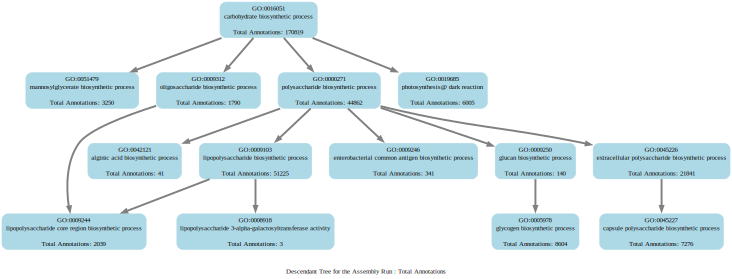

In [12]:
GO_tree(ChartData)

### GO Heatmap

In [13]:
GO_heatmap(ChartData)

alt.Chart(...)